<a href="https://colab.research.google.com/github/santhoshsrivi/AmazonSageMakerCourse/blob/master/ML_Assign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
Airfoil = pd.read_csv('AirfoilSelfNoise.csv')

In [28]:
Airfoil.describe()

,f,alpha,c,U_infinity,delta,SSPL
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


In [19]:
Airfoil.shape

(1503, 6)

In [20]:
Airfoil.head(10)

,f,alpha,c,U_infinity,delta,SSPL
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
5,2500,0.0,0.3048,71.3,0.002663,125.571
6,3150,0.0,0.3048,71.3,0.002663,125.201
7,4000,0.0,0.3048,71.3,0.002663,123.061
8,5000,0.0,0.3048,71.3,0.002663,121.301
9,6300,0.0,0.3048,71.3,0.002663,119.541


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


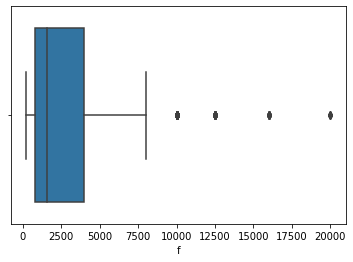

In [34]:
sns.boxplot(Airfoil['f'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


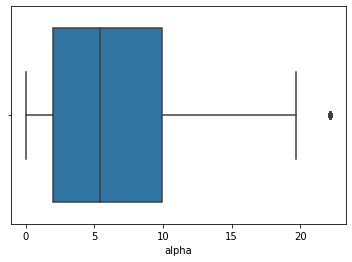

In [35]:
sns.boxplot(Airfoil['alpha'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


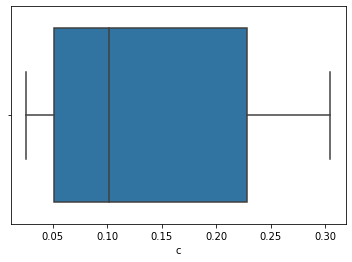

In [36]:
sns.boxplot(Airfoil['c'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


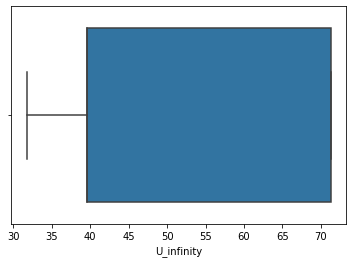

In [37]:
sns.boxplot(Airfoil['U_infinity'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


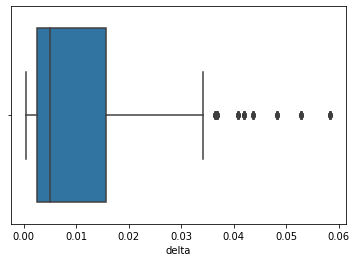

In [38]:
sns.boxplot(Airfoil['delta'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


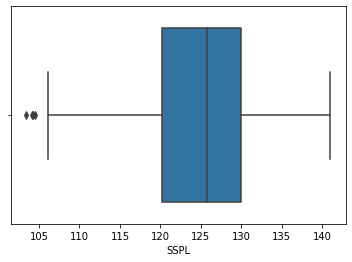

In [39]:
sns.boxplot(Airfoil['SSPL'])

In [23]:
type(Airfoil)

pandas.core.frame.DataFrame

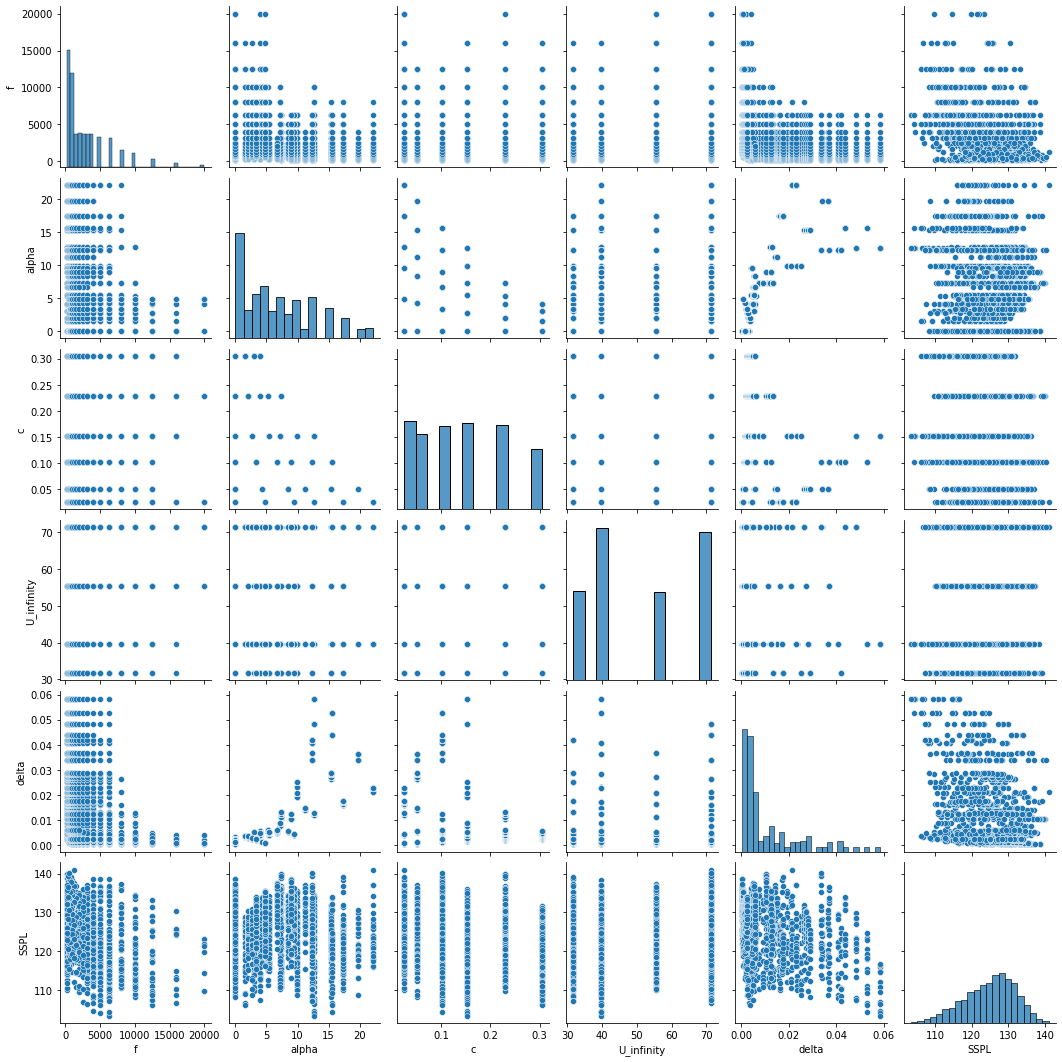

In [40]:
sns.pairplot(Airfoil)

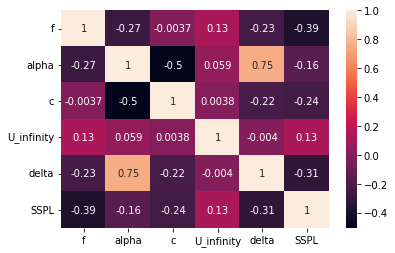

In [42]:
sns.heatmap(Airfoil.corr(),annot=True)

#MULTIPLE LINEAR REGRESSION

In [66]:
from sklearn.metrics import r2_score

In [47]:
X=Airfoil[["f","alpha","c","U_infinity","delta"]]
Y=Airfoil["SSPL"]

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [58]:
from sklearn.linear_model import LinearRegression
mlm = LinearRegression(fit_intercept=True)
mlm.fit(X_train,Y_train)

LinearRegression()

In [59]:
mlm.coef_

array([-1.28041334e-03, -4.10769342e-01, -3.60326340e+01,  9.81537999e-02,
       -1.44109711e+02])

In [60]:
mlm.intercept_

132.84565721248177

In [61]:
y_pred = mlm.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


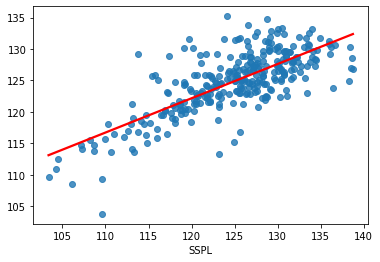

In [71]:
sns.regplot(Y_test,y_pred, line_kws={'color':'red'},ci = None)

In [72]:
Y_test.shape

(301,)

In [73]:
k=5
n = 301

In [74]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2 = r2_score(Y_test,y_pred )
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, y_pred)
adj_r2= 1- ((1-r2)*(n-1)/(n-k-1))
print("R Squared", r2)
print("MSE", mse)
print("RMSE", rmse)
print("MAE", mae)
print("adjusted R Squared", adj_r2)

R Squared 0.5585557273101011
MSE 20.76510149562341
RMSE 4.556874092579628
MAE 3.545248297264666
adjusted R Squared 0.5510736209933231
